In [13]:
import pygfx as gfx
import pylinalg as la
from wgpu.gui.auto import WgpuCanvas

Minimal Example

In [2]:
cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)

RFBOutputContext()

No config found!
EGL says it can present to the window but not natively


JupyterWgpuCanvas()
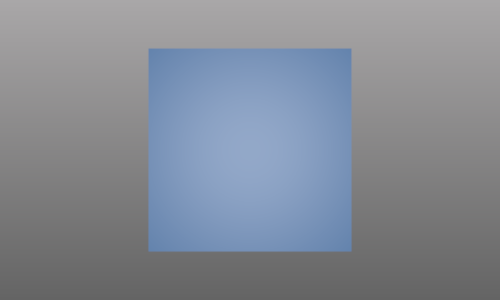

In [3]:
gfx.show(cube)

### Scenes - world or scenario to render

1. Object - object in the world; has a transform (translation, rotation, scaling) and visibility properties
    - Geometry (object's form) - defines shape, positions, data
    - Material (color, reflectiveness, etc.) - defines appearance 
2. Light
3. Camera
    - Perspective Camera - generic camera for 3D content
        - args: fov (in degrees), aspect ratio
    - Orthographic Camera - perspective camera with the fov set to zero
        - args: width, height, maintain_aspect (contents in view are then stretched to fill window)


In [4]:
scene = gfx.Scene()

In [5]:
scene.add(gfx.AmbientLight())
scene.add(gfx.DirectionalLight())

camera = gfx.PerspectiveCamera(70, 16 / 9)
camera.local.z = 400

In [6]:
geometry = gfx.box_geometry(200, 200, 200)
material = gfx.MeshPhongMaterial(color="#336699")
cube = gfx.Mesh(geometry, material)
scene.add(cube)

RFBOutputContext()

JupyterWgpuCanvas()
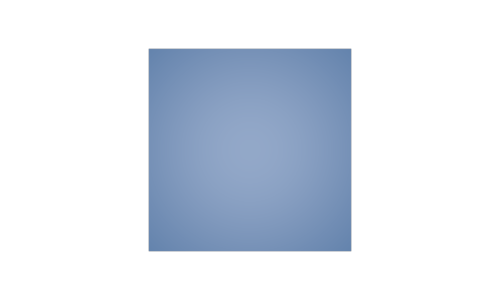

In [7]:
gfx.show(scene)

### Canvases - surface on which the scene is rendered

In [9]:
canvas = WgpuCanvas(size=(200, 200), title="A cube!")
cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)

RFBOutputContext()

JupyterWgpuCanvas(css_height='200px', css_width='200px')
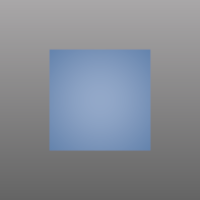

In [10]:
gfx.show(cube, canvas=canvas)

### Renderers - looks at the `Scene` through a `Camera` and draws what it sees onto the surface provided by the `Canvas`

In [11]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)

RFBOutputContext()

JupyterWgpuCanvas()
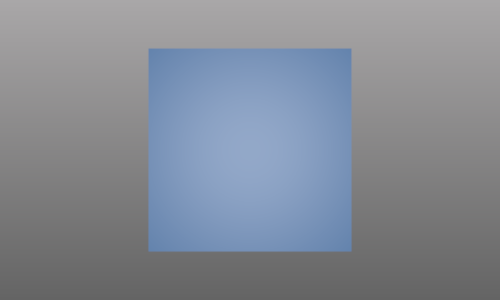

In [12]:
gfx.show(cube, renderer=renderer)

### Animations
    - Done using backend's event loop, which allow callbacks to get executed periodically
    - `before_render` and `after_render`

In [14]:
cube = gfx.Mesh(
    gfx.box_geometry(200, 200, 200),
    gfx.MeshPhongMaterial(color="#336699"),
)

rot = la.quat_from_euler((0, 0.01), order="XY")

def animate():
    cube.local.rotation = la.quat_mul(rot, cube.local.rotation)

RFBOutputContext()

JupyterWgpuCanvas()
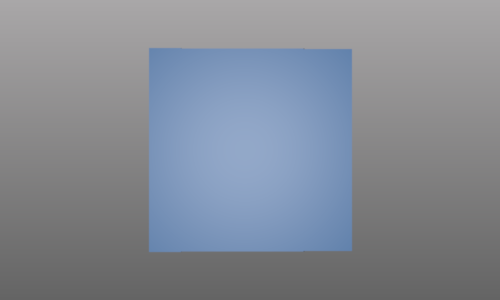

In [15]:
gfx.show(cube, before_render=animate)